In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [5]:
#Observe the Categorical Column and finalize whether it is Nominal or Ordinal Value
#Covert the Categorical Column (Here Nominal) into Number Values (One Hot Encoding / Column Expansion)

dataset = pd.get_dummies(dataset, dtype=int, drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [7]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [11]:
independent = dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [13]:
dependent = dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [153]:
#Here, criterion='squared_error' is a Default value of Parameter
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor (criterion = 'absolute_error', splitter = 'best', max_features = 'log2')

regressor = regressor.fit(X_train,Y_train)

#Here,DecisionTreeRegressor worked out with its default parameters, but we need to do "Hyper Tune the Parameter"

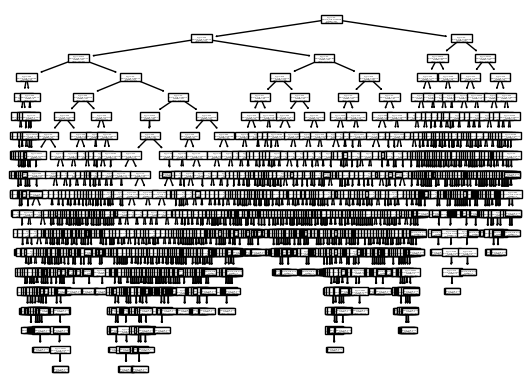

In [155]:
#Library - matplotlib.pyplot is responsible for Graph purpose
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [157]:
#prediction
#Keyword - predict is function of Application 
Y_pred=regressor.predict(X_test)

In [159]:
# Evaluation Metrics - Calculate R-Square Value
from sklearn.metrics import r2_score
r_score = r2_score(Y_test,Y_pred)
r_score

0.7257354153599949

In [161]:
# Naming the Model with its extension .sav
import pickle
filename = "finalized_model_Decision_Tree_Overall_Assignment.sav"

#Model will be saved in respective path, once after the below Code Execution
# Keyword - wb refers to "write binary"
pickle.dump(regressor,open(filename,'wb'))

In [163]:
# Load the Saved Model and check the same to send it for Phase-02 (Deployment)
# # Keyword - rb refers to "read binary"

loaded_model=pickle.load(open("finalized_model_Decision_Tree_Overall_Assignment.sav",'rb'))
result = loaded_model.predict([[20,30,1,1,0]]) 
result

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2639.0429])